In [1]:
import tensorflow as tf
import keras
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout,Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization,Conv3D,MaxPooling3D
from keras.models import Sequential
from keras.models import Model
from keras.datasets import cifar10
from skimage  import color
from keras.models import Model
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score, confusion_matrix
import datetime
import seaborn as sns
from tensorflow.keras.applications import DenseNet121 as DenseNet
from tensorflow.keras.applications.densenet import preprocess_input as preprocess
import json
import os
from sklearn.model_selection import train_test_split


Mounted at /content/drive


##C

In [2]:
with open('drive/MyDrive/imagenet_labels.json') as f:
  Labels = json.load(f)

# base_model = DenseNet( include_top= False, weights="imagenet",input_shape=(32, 32, 3),pooling=None,classes=1000)
base_model = DenseNet( include_top= True, weights="imagenet",pooling=None,classes=1000)



33202176/33188688 [==============================] - 0s 0us/step


In [3]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

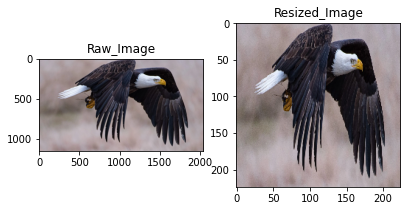

In [7]:
img = plt.imread('drive/MyDrive/eagle.jpg')
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.title('Raw_Image')
plt.imshow(img)
img = cv2.resize(img, (224,224))
plt.subplot(1,3,2)
plt.title('Resized_Image')
plt.imshow(img)
img = preprocess(img)
plt.show()
img = np.array([img])

In [5]:
output = base_model.output
model = keras.Model(base_model.input,output)

y_pred = model.predict(img)
y_pred_Sorted = np.argsort(y_pred)

top_1 = Labels[y_pred_Sorted[0,-1]]
top_2 = Labels[y_pred_Sorted[0,-2]]
top_3 = Labels[y_pred_Sorted[0,-3]]

print(' top_1: ',top_1,'\n','top_2: ',top_2,'\n','top_3: ',top_3)

 top_1:  bald eagle 
 top_2:  kite 
 top_3:  vulture


##D

In [6]:
#########Cifar10 Dataset

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
Labels =['airplane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


In [7]:
## preprocessing

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

## Create one_hot Labels
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)


In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [9]:
## Create Model
base_model = DenseNet( include_top=False, weights="imagenet",input_shape=(32, 32, 3),pooling=None,classes=10)
layer_1 = base_model.output
# layer_2 = Dense(,activation='relu')(layer_1)
# layer_3 = Conv2D(64, kernel_size = (3,3))(layer_2)
layer_4 = Flatten()(layer_1)
output = Dense(10,activation='softmax')(layer_4)
model = keras.Model(base_model.input,output)
for layer in model.layers[:-3]:
    layer.trainable=False
for layer in model.layers[-3:]:
    layer.trainable=True

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

29097984/29084464 [==============================] - 0s 0us/step


In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']       

In [11]:
## Train_Model
start = datetime.datetime.now()
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.1)
end = datetime.datetime.now()

Epoch 1/10
704/704 [==============================] - 47s 52ms/step - loss: 1.3979 - accuracy: 0.5160 - val_loss: 1.1770 - val_accuracy: 0.5978
Epoch 2/10
704/704 [==============================] - 33s 46ms/step - loss: 1.1265 - accuracy: 0.6084 - val_loss: 1.1058 - val_accuracy: 0.6178
Epoch 3/10
704/704 [==============================] - 31s 44ms/step - loss: 1.0721 - accuracy: 0.6279 - val_loss: 1.0760 - val_accuracy: 0.6202
Epoch 4/10
704/704 [==============================] - 33s 46ms/step - loss: 1.0450 - accuracy: 0.6373 - val_loss: 1.0720 - val_accuracy: 0.6270
Epoch 5/10
704/704 [==============================] - 29s 42ms/step - loss: 1.0300 - accuracy: 0.6414 - val_loss: 1.0609 - val_accuracy: 0.6328
Epoch 6/10
704/704 [==============================] - 30s 43ms/step - loss: 1.0186 - accuracy: 0.6468 - val_loss: 1.0854 - val_accuracy: 0.6252
Epoch 7/10
704/704 [==============================] - 31s 44ms/step - loss: 1.0094 - accuracy: 0.6481 - val_loss: 1.0646 - val_accuracy:

In [12]:
## Evaluate_Model
test_loss,test_accuracy = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

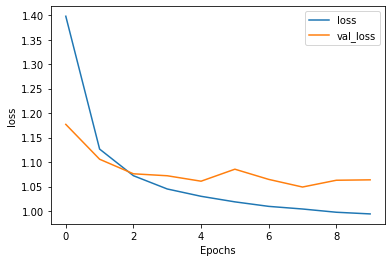

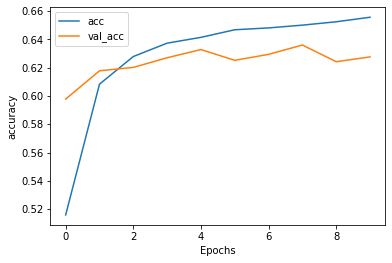

In [13]:
## Plot
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

test loss = 1.073032
test accuracy = 0.634400
Accuracy: 0.634400
Precision: 0.638873
Recall: 0.634400
F1 score: 0.632610
Training_Time =  0:05:33.045261


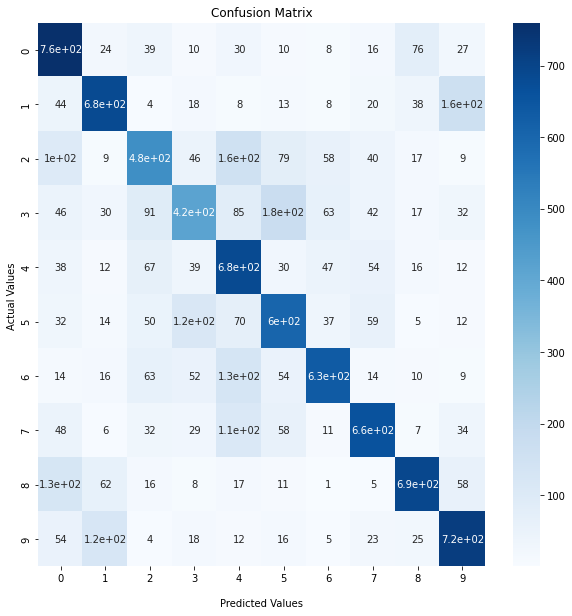

In [14]:
## Precision,recall,F1,Confusion_matrix

print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)
print("Training_Time = ",end-start)
cf_matrix  = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10, 10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()